In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('project_18_covid.csv',parse_dates=['Date'])
df.head(218)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
213,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0
214,2020-04-19,Russia,145927292,1940000.0,42853.0,361.0,3291.0,8.0,39201.0
215,2020-04-19,Spain,46752703,930230.0,198674.0,20453.0,77357.0,7371.0,100864.0
216,2020-04-19,Brazil,212380932,62985.0,38654.0,2462.0,22130.0,6634.0,14062.0


In [3]:
df.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [4]:
df=df.fillna(df.median())

In [5]:
df.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

In [6]:
df_dates=pd.DataFrame()
df_dates['Day']=df['Date'].dt.day
df_dates['Month']=df['Date'].dt.month_name()
df_dates['Year']=df['Date'].dt.year
df_dates['Total_Tests']=df['Total Tests']
df_dates['Total Cases']=df['Total Cases']
df_dates['Total Deaths']=df['Total Deaths']
df_dates['Total Recovered']=df['Total Recovered']
df_dates['Serious or Critical']=df['Serious or Critical']
df_dates['Active Cases']=df['Active Cases']
df_dates

,Day,Month,Year,Total_Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,18,April,2020,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,18,April,2020,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,18,April,2020,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,18,April,2020,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,18,April,2020,460437.0,114217.0,15464.0,219.0,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,18,May,2020,25478.0,6.0,24.0,6.0,13.0,0.0
6599,18,May,2020,25478.0,6.0,24.0,6.0,13.0,0.0
6600,18,May,2020,25478.0,3.0,24.0,3.0,13.0,0.0
6601,18,May,2020,25478.0,1.0,24.0,219.0,13.0,1.0


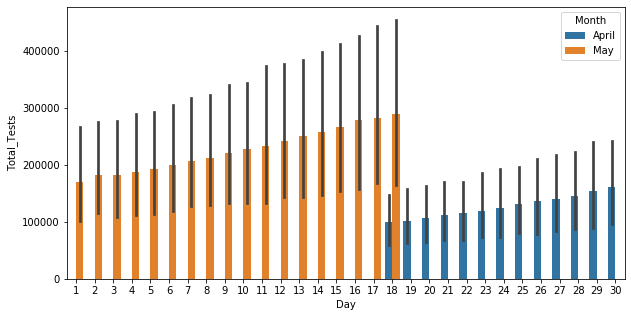

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(x='Day',y='Total_Tests',hue='Month',data=df_dates)

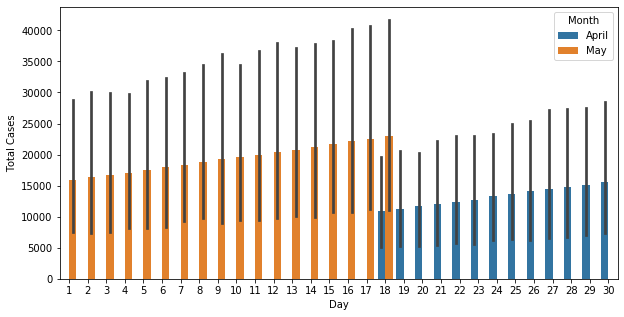

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x='Day',y='Total Cases',hue='Month',data=df_dates)

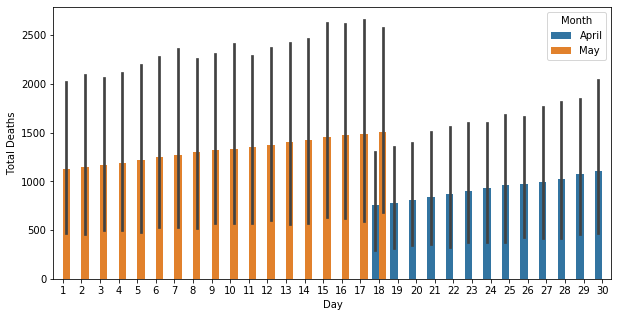

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x='Day',y='Total Deaths',hue='Month',data=df_dates)

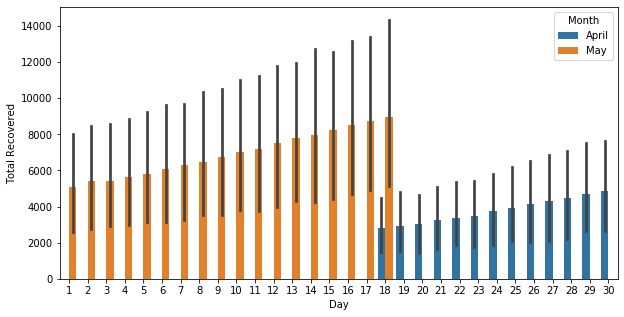

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x='Day',y='Total Recovered',hue='Month',data=df_dates)

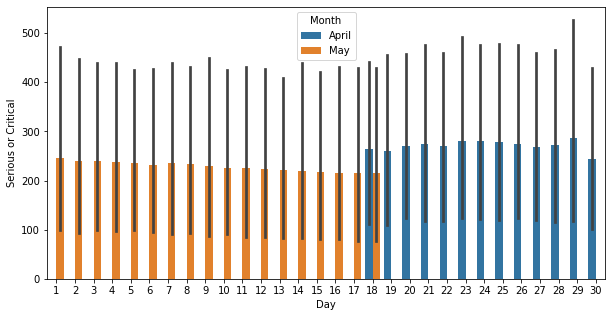

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x='Day',y='Serious or Critical',hue='Month',data=df_dates)

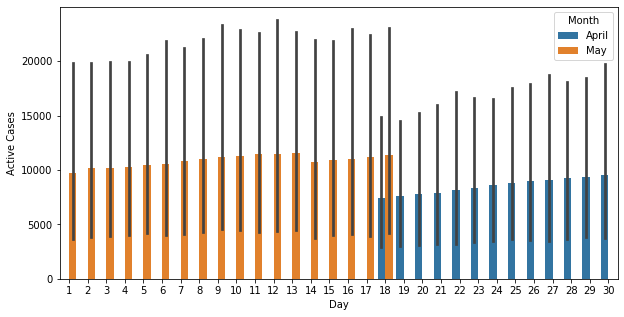

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x='Day',y='Active Cases',hue='Month',data=df_dates)

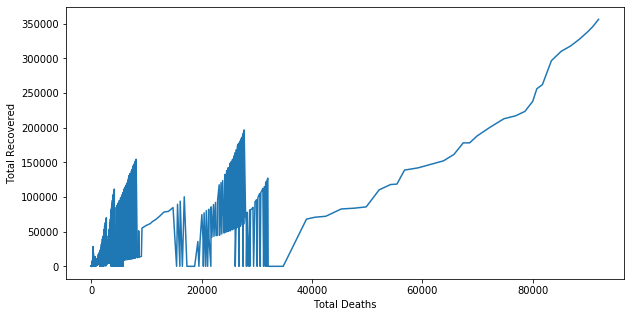

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Total Deaths',y='Total Recovered',data=df)

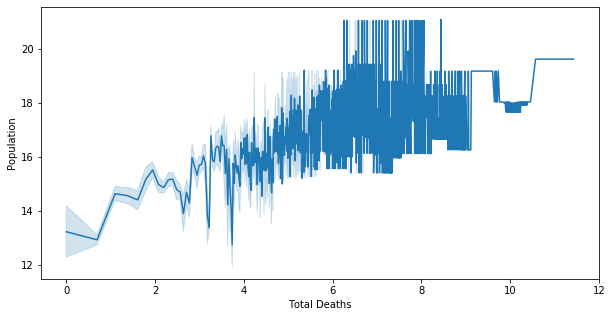

In [41]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Total Deaths',y='Population',data=df)

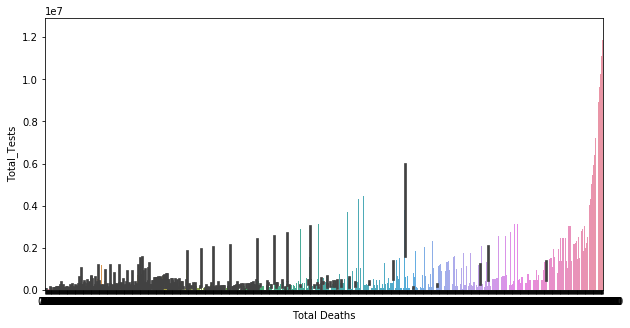

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='Total Deaths',y='Total_Tests',data=df_dates)

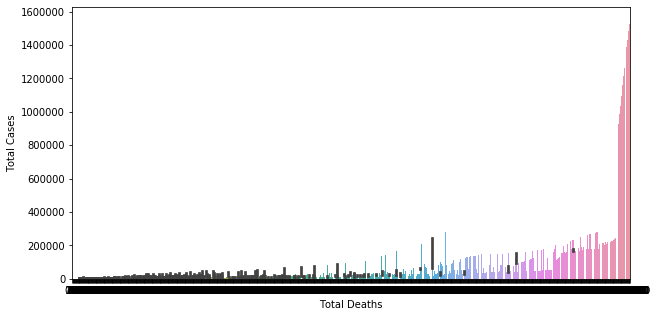

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x='Total Deaths',y='Total Cases',data=df_dates)

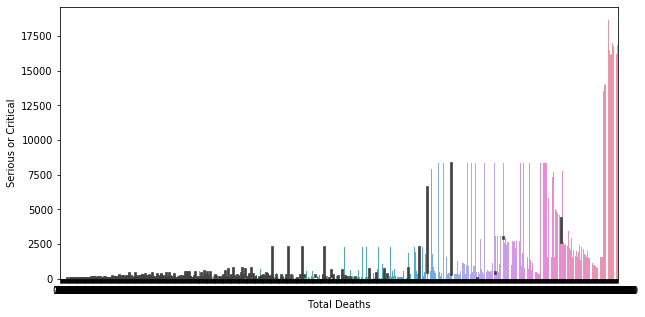

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x='Total Deaths',y='Serious or Critical',data=df_dates)

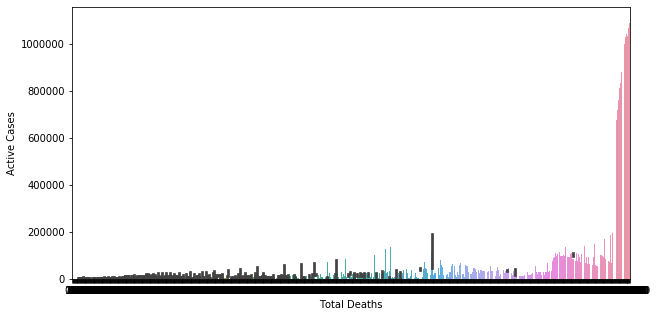

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x='Total Deaths',y='Active Cases',data=df_dates)

In [18]:
a=0.189+0.657+0.154
a

1.0

In [19]:
b=0.17600000000000002+0.657+0.154
b

0.9870000000000001

In [20]:
c=0.147+0.659+0.194
c

1.0

In [21]:
df.sum(axis = 0, skipna = True) 

Population             2.402114e+11
Total Tests            1.221047e+09
Total Cases            1.109872e+08
Total Deaths           7.630689e+06
Total Recovered        3.705698e+07
Serious or Critical    1.624561e+06
Active Cases           6.522139e+07
dtype: float64

In [22]:
a=df['Total Tests'].sum()
a

1221046857.0

In [23]:
d=df['Total Cases'].sum()
d

110987172.5

In [24]:
e=df['Serious or Critical'].sum()
e

1624561.0

In [25]:
f=df['Active Cases'].sum()
f

65221394.0

In [26]:
b=df['Total Deaths'].sum()
b

7630689.0

In [27]:
c

1.0

In [28]:
c=df['Total Recovered'].sum()
c

37056985.0

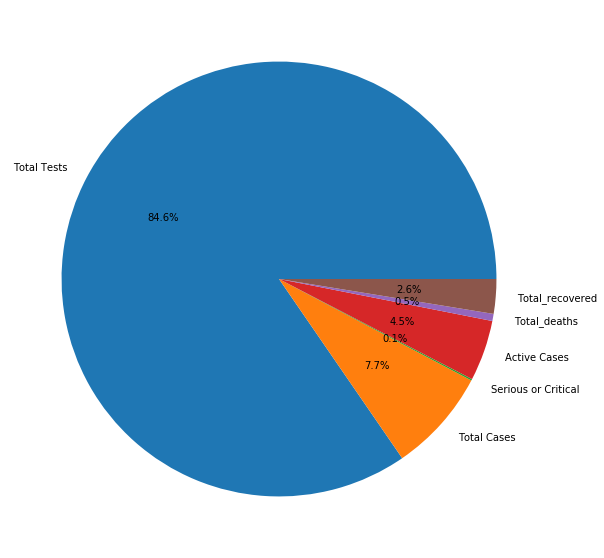

In [30]:

# Creating dataset 
pop = ['Total Tests','Total Cases','Serious or Critical','Active Cases','Total_deaths','Total_recovered'] 
  
data = [1221046857.0,110987172.5,1624561.0,65221394.0,7630689.0,37056985.0] 
  
# Creating plot 
fig = plt.figure(figsize =(10, 10)) 
plt.pie(data, labels = pop,autopct='%1.1f%%') 
  
# show plot 
plt.show()

In [31]:
#Lets describe the data statistically
df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,6.603000e+03,6.603000e+03,6603.000000,6603.000000,6603.000000,6.603000e+03
mean,3.637913e+07,1.849230e+05,1.680860e+04,1155.639709,5612.143723,246.033773,9.877540e+03
std,1.411537e+08,6.971325e+05,8.829631e+04,6015.559135,22984.083710,1321.936609,6.512371e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,4.733000e+03,8.000000e+01,8.000000,29.000000,7.000000,2.700000e+01
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02
75%,2.546422e+07,1.019110e+05,4.757000e+03,109.000000,1302.500000,27.000000,1.991000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


In [32]:
#Lets check the correlation.
dfcor= df.corr()
dfcor

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Population,1.000000,0.217547,0.226134,0.184768,0.310737,0.172339,0.179588
Total Tests,0.217547,1.000000,0.898828,0.812510,0.795733,0.745569,0.855645
Total Cases,0.226134,0.898828,1.000000,0.935240,0.819069,0.892219,0.975026
Total Deaths,0.184768,0.812510,0.935240,1.000000,0.796069,0.833228,0.881907
Total Recovered,0.310737,0.795733,0.819069,0.796069,1.000000,0.723215,0.685226
Serious or Critical,0.172339,0.745569,0.892219,0.833228,0.723215,1.000000,0.875899
Active Cases,0.179588,0.855645,0.975026,0.881907,0.685226,0.875899,1.000000


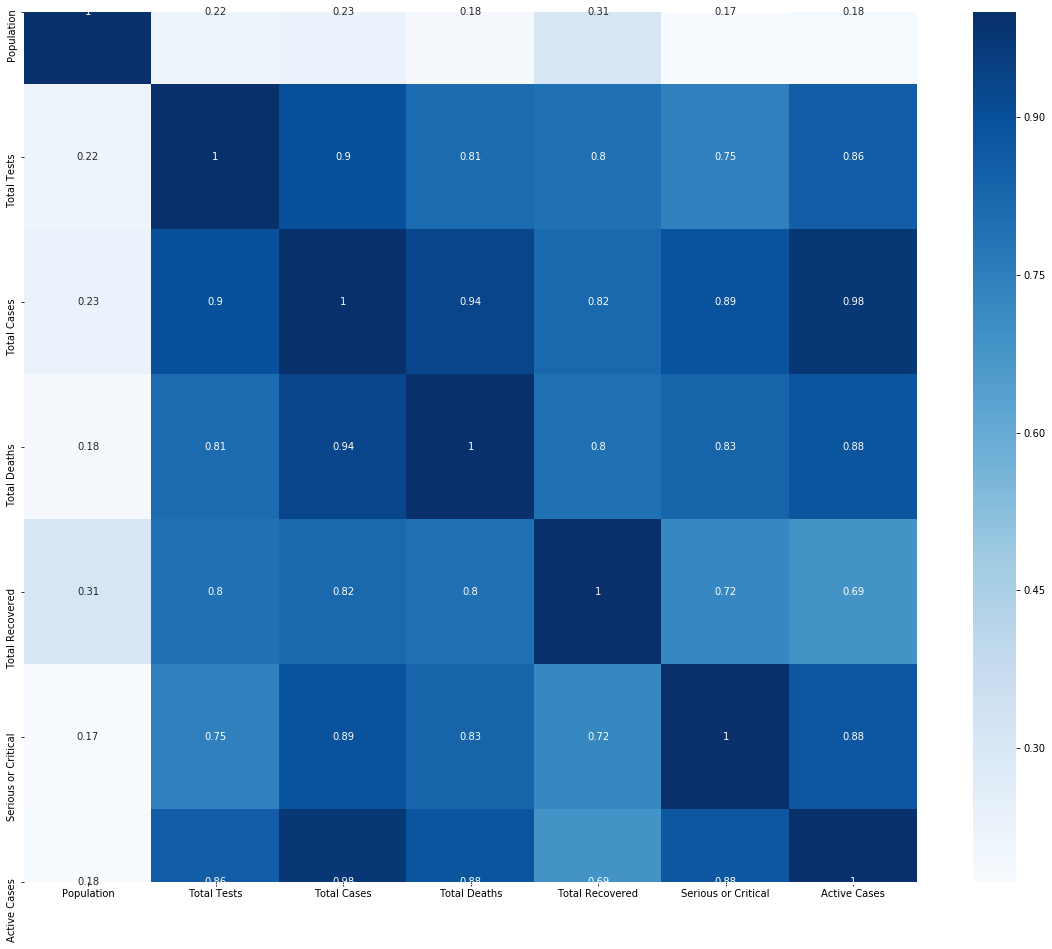

In [33]:
plt.figure(figsize = (20,16))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

In [34]:
df.drop(['Date','Country'],axis=1,inplace=True)

In [35]:
#Now lets check the skewness
df.skew()

Population              8.743503
Total Tests             9.327844
Total Cases            12.079492
Total Deaths            8.970496
Total Recovered         7.224953
Serious or Critical     9.254038
Active Cases           13.301565
dtype: float64

In [36]:
#Treating using log
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [37]:
df.skew()

Population            -0.672563
Total Tests           -0.301656
Total Cases            0.189954
Total Deaths           1.041062
Total Recovered        0.361655
Serious or Critical    1.405479
Active Cases           0.080893
dtype: float64

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72017001, 2.22972373, 2.58663366, ..., 2.22095216, 3.85307411,
        2.64907612],
       [1.40034579, 1.92662718, 1.49092124, ..., 1.00697719, 0.43985668,
        1.65449582],
       [0.95549338, 1.63690301, 2.09898556, ..., 2.25664805, 3.49586395,
        2.02394115],
       ...,
       [2.18884951, 0.09883575, 1.84287885, ..., 1.58819465, 0.18063287,
        1.87089983],
       [0.24979687, 0.09883575, 2.09606893, ..., 0.0217885 , 0.18063287,
        1.63632067],
       [2.56003139, 0.09883575, 2.09606893, ..., 1.85913544, 0.18063287,
        1.87089983]])

In [39]:
threshold=3
print(np.where(z>3))

(array([   0,    0,    2,    3,    6,    9,  199,  207,  213,  213,  215,
        216,  219,  222,  412,  426,  426,  428,  429,  432,  435,  625,
        639,  639,  641,  642,  645,  648,  838,  852,  852,  854,  855,
        858,  861, 1051, 1065, 1065, 1067, 1068, 1071, 1264, 1278, 1278,
       1280, 1281, 1284, 1477, 1491, 1491, 1493, 1494, 1497, 1690, 1704,
       1704, 1706, 1707, 1710, 1903, 1917, 1917, 1919, 1920, 1923, 2116,
       2130, 2130, 2132, 2133, 2136, 2329, 2343, 2343, 2345, 2346, 2349,
       2542, 2556, 2556, 2559, 2562, 2755, 2769, 2769, 2772, 2775, 2968,
       2982, 2982, 2985, 2988, 3181, 3195, 3195, 3198, 3200, 3201, 3394,
       3408, 3408, 3411, 3413, 3414, 3607, 3621, 3621, 3624, 3625, 3626,
       3627, 3820, 3834, 3834, 3837, 3838, 3839, 4033, 4047, 4047, 4050,
       4051, 4052, 4246, 4260, 4260, 4263, 4264, 4265, 4459, 4473, 4473,
       4476, 4477, 4478, 4672, 4686, 4686, 4689, 4690, 4691, 4885, 4899,
       4899, 4902, 4903, 4904, 5098, 5112, 5112, 5

In [40]:
df_new=df[((z<3).all(axis=1))] #Removing the outliers
df_new

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
1,18.798619,14.420860,10.513090,5.749393,8.025516,2.197225,10.417029
4,18.032725,13.039933,11.645864,9.646335,5.393628,7.352441,11.496898
5,17.917690,14.082352,12.077819,10.053114,10.712816,7.913521,11.587773
7,18.243381,14.362682,11.875657,8.420462,11.355113,7.980366,10.892787
8,18.249063,13.302907,11.318491,7.544861,9.254740,7.546974,11.156065
...,...,...,...,...,...,...,...
6598,9.197762,10.145610,1.945910,3.218876,1.945910,2.639057,0.000000
6599,13.297095,10.145610,1.945910,3.218876,1.945910,2.639057,0.000000
6600,9.615005,10.145610,1.386294,3.218876,1.386294,2.639057,0.000000
6601,14.576427,10.145610,0.693147,3.218876,5.393628,2.639057,0.693147


In [42]:
df1=df_new[['Population','Total Tests','Total Recovered','Serious or Critical','Active Cases']]

In [43]:
x=df1

In [44]:
x.shape

(6444, 5)

In [45]:
y=df_new[['Total Deaths']]

In [46]:
y.shape

(6444, 1)

In [47]:
#Scaling the input variable
#Algorithm requires all features to be on common scale

In [48]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x = scale.fit_transform(x)

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_r_score = 0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print('max r2 score corresponding to',final_r_state,'is',max_r_score)

max r2 score corresponding to 78 is 0.7348203500245241


In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring ='r2').mean()

0.6981709352705797

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 95,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)

In [52]:
lreg.score(x_train,y_train)

0.7012249496419611

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [54]:
model = [LinearRegression(),RandomForestRegressor(n_estimators = 200, random_state = 45),GradientBoostingRegressor(),AdaBoostRegressor()]

In [55]:
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    print('score',score)

score 0.7012249496419611
score 0.9876765095189581
score 0.8980277370813559
score 0.7754901737971286


In [56]:
cros_val= [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]
for cv in cros_val:
    score= cross_val_score(cv,x,y,cv=5,scoring='r2')
    print(score.mean())

0.6965597080105985
0.9264577753686878
0.8722251534200117
0.7553092008451616


In [57]:
rf=RandomForestRegressor(n_estimators = 200, random_state = 45)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9876765095189581

In [60]:
from sklearn.externals import joblib
joblib.dump(rf,'rfcovid_world.obj')
rf_from_joblib = joblib.load('rfcovid_world.obj')
rf_from_joblib.predict(x_test)

array([4.42949495, 3.21565695, 6.25817258, ..., 6.19966969, 4.25338325,
       3.21887582])